#  Bay Wheels exploration
## by Ibrahim Olayiwola

## Investigation Overview
The goal of this analysis is to get time most trips were taken and which of the users took it. it is also to know the genders.

Some key Insights includes:
- The peak time for rides is at 08:00hrs and at 17:00hrs.
- Approximately 75% of users are male and 95% of users are subscribers.
- The beginning of the month is when most users take their rides.


## Dataset Overview

Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate, a subsidiary of Lyft, in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations it is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose. The data used for this analysis is that of **December 2019** and it can be found [here](https://s3.amazonaws.com/baywheels-data/index.html).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# Load dataset
df = pd.read_csv('df_explored.csv')

##  What is the gender Distribution of Users.

> - The data shows that most of the users are male with approximately 75% of all users identifying as male. It also shows that 23% identify as females while just 2.1% identified as others.

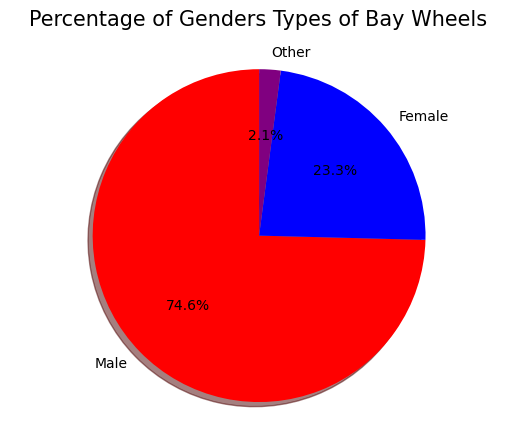

In [3]:
# First, we calculate the proportion of users gender
male_count = df.query('member_gender == "Male"')['bike_id'].count()
female_count = df.query('member_gender == "Female"')['bike_id'].count()
other_count = df.query('member_gender == "Other"')['bike_id'].count()

male_prop = male_count / df['bike_id'].count()
female_prop = female_count / df['bike_id'].count()
other_prop = other_count / df['bike_id'].count()

label = ['Male', 'Female', 'Other'] 
sizes = [male_prop, female_prop, other_prop]
colors = ['red', 'blue', 'purple']

plt.pie(sizes,  colors = colors, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of Genders Types of Bay Wheels", y=1.05, fontsize=15, fontweight='medium');

plt.show()

## What percentage of users are subscribers?
From the data, it is noted that 90.5% of users are subscribers and only 9.5% of users are customers. This is a good sign as if 90% of all users are subscribers, it means they are doing something right and what they might need to replicate what they are doing here to other cities closer to their base of operations.

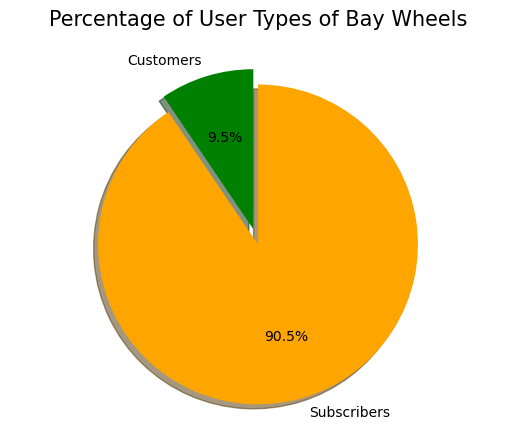

In [4]:
# Calculate the proportion of user type
customer_count = df.query('user_type == "Customer"')['bike_id'].count()
subscriber_count = df.query('user_type == "Subscriber"')['bike_id'].count()

customer_prop = customer_count / df['bike_id'].count()
subscriber_prop = subscriber_count / df['bike_id'].count()

labels = ['Customers', 'Subscribers'] 
sizes = [customer_prop, subscriber_prop]
colors = ['green', 'orange']
explode = (0, 0.1) # Explode subscribers slice

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of User Types of Bay Wheels", y=1.05, fontsize=15, fontweight='medium');

plt.show()

##  What is the average Hourly usage of bay wheels?

The visualization shows the average amount of trips that was taken through each hour in each day in the month. It showed that the most users used the services at 08:00hrs and at 17:00hrs. This is true for both the start time hours and end time hours of the data.


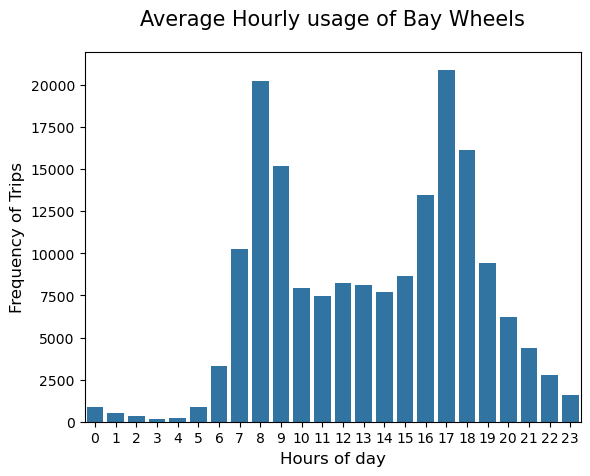

In [5]:
# Hourly usage of the bike system
base_color = sb.color_palette()[0]
g = sb.countplot(data=df, x='start_time_hour', color = base_color)
plt.title("Average Hourly usage of Bay Wheels", y=1.05, fontsize=15, fontweight='medium');
plt.xlabel('Hours of day', y=1.05, fontsize=12, fontweight='medium');
plt.ylabel('Frequency of Trips', y=0.5, fontsize=12, fontweight='medium');

## What is the Average Hourly usage of Bay Wheels by User Type?
The peak hours of 08:00hrs and 17:00hrs is the same irrespective of type of users. Either subcribers or customers. This might be an opportunity for baywheels as it can provide more bikes at that time.

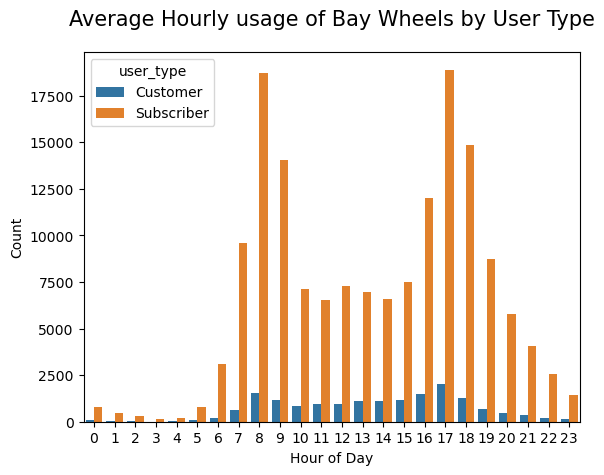

In [6]:
# Using Seaborn to get how the customers use the bikes.
sb.countplot(data=df, x='start_time_hour', hue='user_type');
plt.title("Average Hourly usage of Bay Wheels by User Type", y=1.05, fontsize=15, fontweight='medium');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

## Daily Average Duration of Trips by User Type

The beginning of the month is when most users take their rides. This might be due to different reasons, like payments being made at the beginning and users wanting to use the service they paid for.

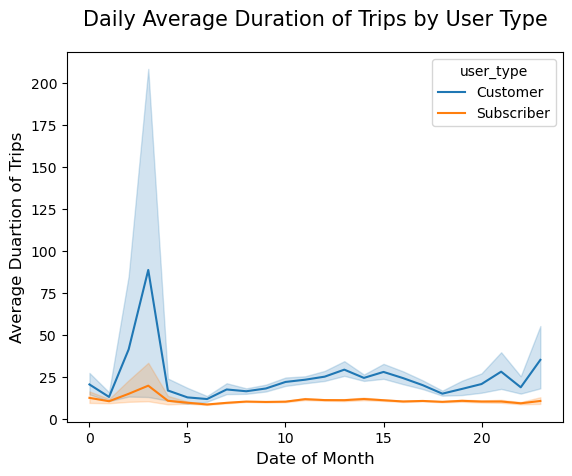

In [7]:
ax = sb.lineplot(x='start_time_hour', y='duration_min',
                  hue="user_type", data=df)
plt.title("Daily Average Duration of Trips by User Type", y=1.05, fontsize=15, fontweight='medium');
plt.xlabel('Date of Month', y=1.05, fontsize=12, fontweight='medium');
plt.ylabel('Average Duartion of Trips', y=0.5, fontsize=12, fontweight='medium');

## What is the Daily Average Duration of Trips by Gender?

The maximum average duration of trips by the male and female gender is 20 minutes. Also it is noticed that most users take trips for more than 10 minutes. It is also seen in the chart that those that identified as neither male nor females tend to take more time on a trip.


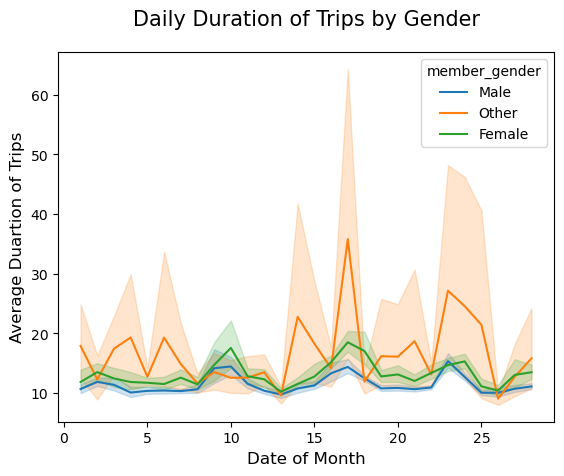

In [8]:
ax = sb.lineplot(x='start_date', y='duration_min',
                  hue="member_gender", data=df)
plt.title("Daily Duration of Trips by Gender", y=1.05, fontsize=15, fontweight='medium');
plt.xlabel('Date of Month', y=1.05, fontsize=12, fontweight='medium');
plt.ylabel('Average Duartion of Trips', y=0.5, fontsize=12, fontweight='medium');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [9]:
# Use this command if you are running this file in local
!jupyter nbconvert bay_wheels_exploration_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

^C
